In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls "/content/gdrive/My Drive"

 _15-02-2017_13-54-12.mp4
'2017 Spring Training (public)'
'AI Projecct'
 appointmentconfirmation
 audio
 ca-statement.doc
'Colab Notebooks'
'CONF & APPS'
'Content writing'
'Copy of d.challenge :: Tic-Toc .gsheet'
'Copy of siliconvalleymeetup_letterofsupport.gdoc'
 CYNSA
 daudio
'Design Thinking Workshop.gform'
'Design Thinking Workshop (Responses).gsheet'
 ELA.rtf
 Headshot
 IFTTT
'IMPORTANT DOCUMENTS'
 Introduction:.gdoc
 Kancharla_Tejaswini.pdf
'Kethan Krishan LOR.pdf'
'Learn Startup- SVU'
 MS
'MY BOOKS'
'My Resume.pdf'
 PKS
'Resume for global conferences.docx'
 Resume.pdf
 Tejaswini
'TejaswiniKancharla_InternshalaResume (1).pdf'
'UIF RELATED EVENTS'
'UIF SPRING 2017'
'Welcome to Pragyan.pdf'


In [0]:
import os
import numpy as np
from tensorflow.python.platform import gfile
from scipy.io import wavfile
from scipy import signal
from sklearn.model_selection import train_test_split

In [0]:
search_path = os.path.join("/content/gdrive/My Drive/daudio",'*', '*.wav')
wav_list=[]
sample_ratio=0.01
# edited print line
print(gfile.Glob(search_path))
for wav_path in gfile.Glob(search_path):
    wav_list.append(wav_path)
wav_list=np.array(wav_list)

['/content/gdrive/My Drive/daudio/five/aff582a1_nohash_1.wav', '/content/gdrive/My Drive/daudio/five/bbaa7946_nohash_0.wav', '/content/gdrive/My Drive/daudio/five/f953e1af_nohash_1.wav', '/content/gdrive/My Drive/daudio/five/86648261_nohash_0.wav', '/content/gdrive/My Drive/daudio/five/bd2db1a5_nohash_0.wav', '/content/gdrive/My Drive/daudio/five/7dc95912_nohash_1.wav', '/content/gdrive/My Drive/daudio/five/da584bc0_nohash_2.wav', '/content/gdrive/My Drive/daudio/five/a2b16113_nohash_1.wav', '/content/gdrive/My Drive/daudio/five/21832144_nohash_3.wav', '/content/gdrive/My Drive/daudio/five/7c1d8533_nohash_1.wav', '/content/gdrive/My Drive/daudio/five/989a2213_nohash_0.wav', '/content/gdrive/My Drive/daudio/five/61a0d340_nohash_0.wav', '/content/gdrive/My Drive/daudio/five/b52bd596_nohash_1.wav', '/content/gdrive/My Drive/daudio/five/09bcdc9d_nohash_0.wav', '/content/gdrive/My Drive/daudio/five/c2bc4489_nohash_1.wav', '/content/gdrive/My Drive/daudio/five/49af4432_nohash_3.wav', '/conte

In [0]:
!pip install librosa
import librosa


In [0]:
samples=[]
labels=[]
for i in wav_list:
    m=list(wavfile.read(i)[1])
    if len(m)==16000:
      samples.append(list(map(float,m)))
      i=i.split("/")
      labels.append(i[5])

In [0]:
samples=[i[4000:13000] for i in samples]

In [0]:
samples=np.array(samples)

In [0]:
from sklearn import preprocessing
samples=preprocessing.scale(samples)


In [0]:
import librosa
s=[]
for i in samples:
    j=librosa.feature.melspectrogram(i, sr=16000, n_mels=128)
    s.append(librosa.power_to_db(j, ref=np.max))


In [0]:
#encode={"_background_noise_":[],"bed":[],"bird":[],"cat":[],"dog":[],
        "down":[],"eight":[],"five":[],"four":[],"go":[],"happy":[],
        "house":[],"left":[],"marvin":[],"nine":[],"no":[],"off":[],
        "on":[],"one":[],"right":[],"seven":[],"sheila":[],
        "six":[],"stop":[],"three":[],"tree":[],"two":[],"up":[],
        "wow":[],"yes":[],"zero":[]}
#k=0
#for i in encode:
    #encode[i]=[0 if x!=k else 1 for x in range(31)]
    #k=k+1

In [0]:
encode={"bed":[1,0,0,0],"five":[0,1,0,0],"dog":[0,0,1,0],"happy":[0,0,0,1]}

In [0]:
labels=[encode[i] for i in labels]

In [0]:
samples,x_test,labels,y_test=train_test_split(s,labels, test_size=0.2, stratify=labels)

In [0]:
samples=np.array(samples)
x_test=np.array(x_test)
print(samples.shape)
print(x_test.shape)

(5392, 128, 18)
(1349, 128, 18)


In [0]:
labels=np.array(labels)
y_test=np.array(y_test)

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import optimizers
from keras import preprocessing
from keras import regularizers

Using TensorFlow backend.


LSTM MODEL TO PREDICT SPOKEN WORD

In [0]:
model = Sequential()  
model.add(LSTM(200, input_shape=(128,18),activation="tanh",return_sequences=False,kernel_initializer="glorot_uniform"))
model.add(Dropout(0.4))
model.add(Dense(4, activation="softmax",kernel_initializer="glorot_uniform"))
adam = optimizers.adam(lr=0.1, decay=0.001)
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
history=model.fit(samples, labels, nb_epoch=1000, batch_size=500,
          verbose=2,validation_data=(x_test, y_test))
predict = model.predict_classes(samples)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 5392 samples, validate on 1349 samples
Epoch 1/1000
 - 5s - loss: 1.4869 - acc: 0.2871 - val_loss: 1.3596 - val_acc: 0.3165
Epoch 2/1000
 - 4s - loss: 1.4324 - acc: 0.2984 - val_loss: 1.3442 - val_acc: 0.3484
Epoch 3/1000
 - 4s - loss: 1.4134 - acc: 0.3003 - val_loss: 1.3332 - val_acc: 0.3529
Epoch 4/1000
 - 4s - loss: 1.4012 - acc: 0.3127 - val_loss: 1.3389 - val_acc: 0.3506
Epoch 5/1000
 - 4s - loss: 1.3999 - acc: 0.3093 - val_loss: 1.3226 - val_acc: 0.3432
Epoch 6/1000
 - 4s - loss: 1.3766 - acc: 0.3323 - val_loss: 1.3153 - val_acc: 0.3766
Epoch 7/1000
 - 4s - loss: 1.3512 - acc: 0.3505 - val_loss: 1.3128 - val_acc: 0.3617
Epoch 8/1000
 - 4s - loss: 1.3430 - acc: 0.3537 - val_loss: 1.3026 - val_acc: 0.3921
Epoch 9/1000
 - 4s - loss: 1.3348 - acc: 0.3544 - val_loss: 1.2814 - val_acc: 0.4173
Epoch 10/1000
 - 4s - loss: 1.3228 - acc: 0.3626 - val_loss: 1.2769 - val_acc: 0.4129
Epoch 11/1000
 - 4s - loss: 1.3136 - acc: 0.3746 - val_loss: 1.2736 - val_acc: 0.4092
Epoch 12/1000
 

In [0]:
print(predict)

[1 1 3 ... 3 1 3]


In [0]:
predict=model.predict_classes(samples)

In [0]:
print(predict)

[3 3 3 ... 3 1 3]


In [0]:
predict.shape

(3900,)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


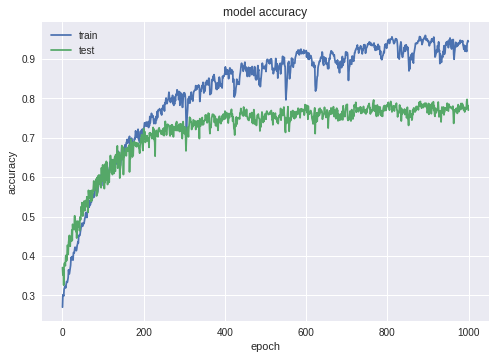

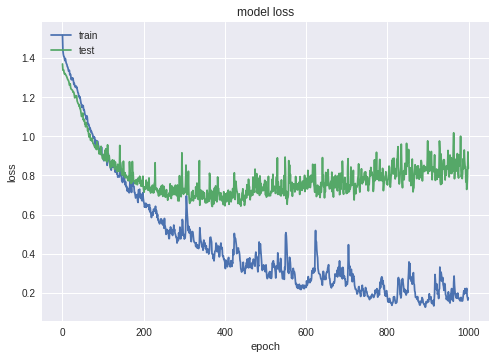

In [0]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()